## House Prices - Advanced Regression Techniques
### Kaggle Public Score: 0.12250  (Top 12%)


### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Preprocessing

In [2]:
train=pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
test=pd.read_csv('test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
nandata=train.isnull().sum()
print(nandata.to_string())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
nandata=test.isnull().sum()
print(nandata.to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

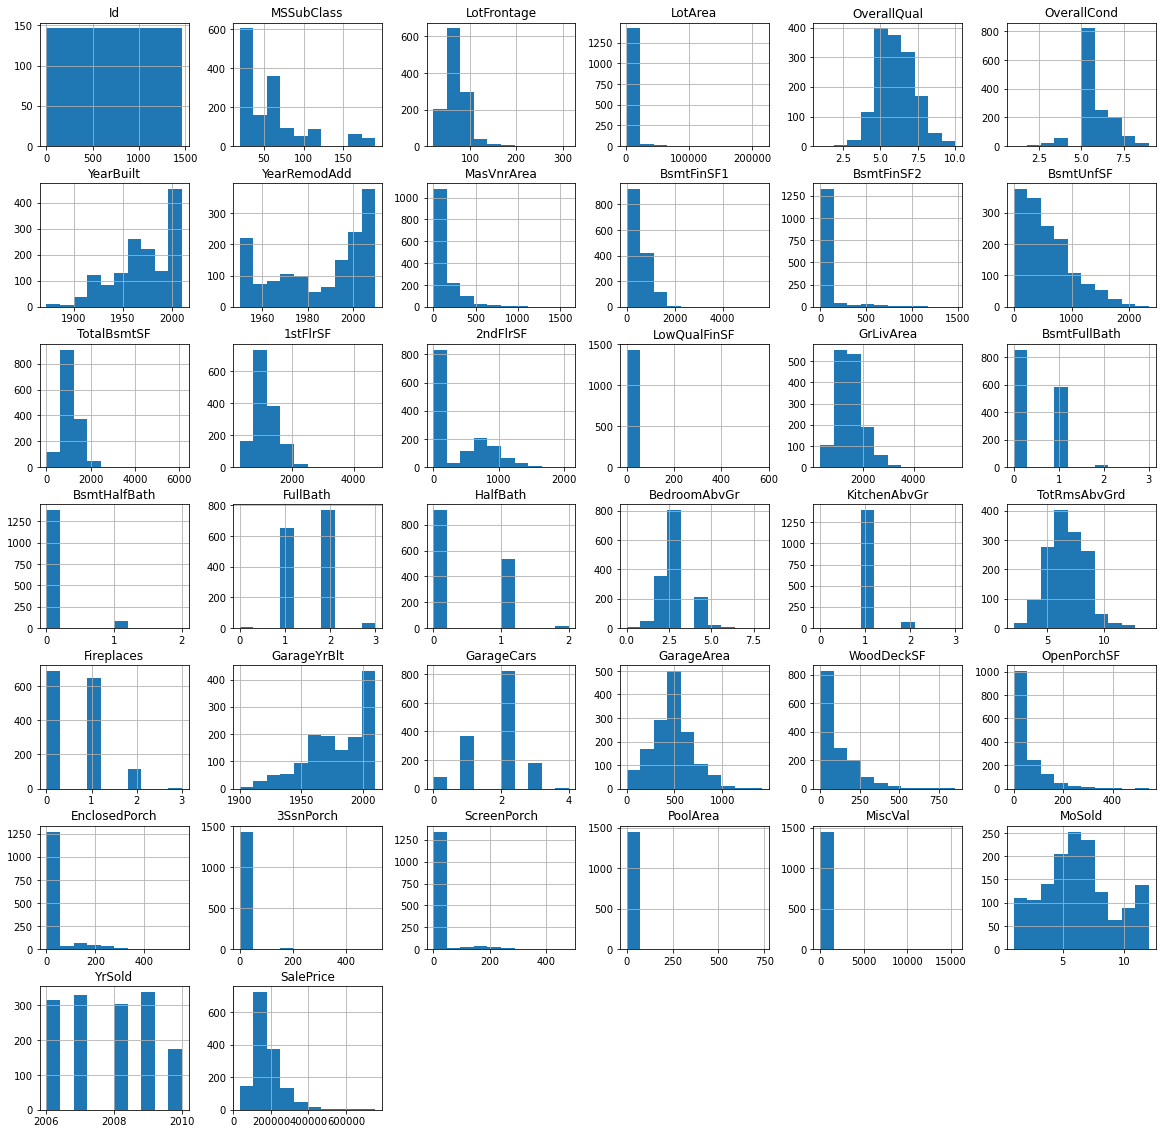

In [6]:
train.hist(figsize=[20,20])
plt.show()

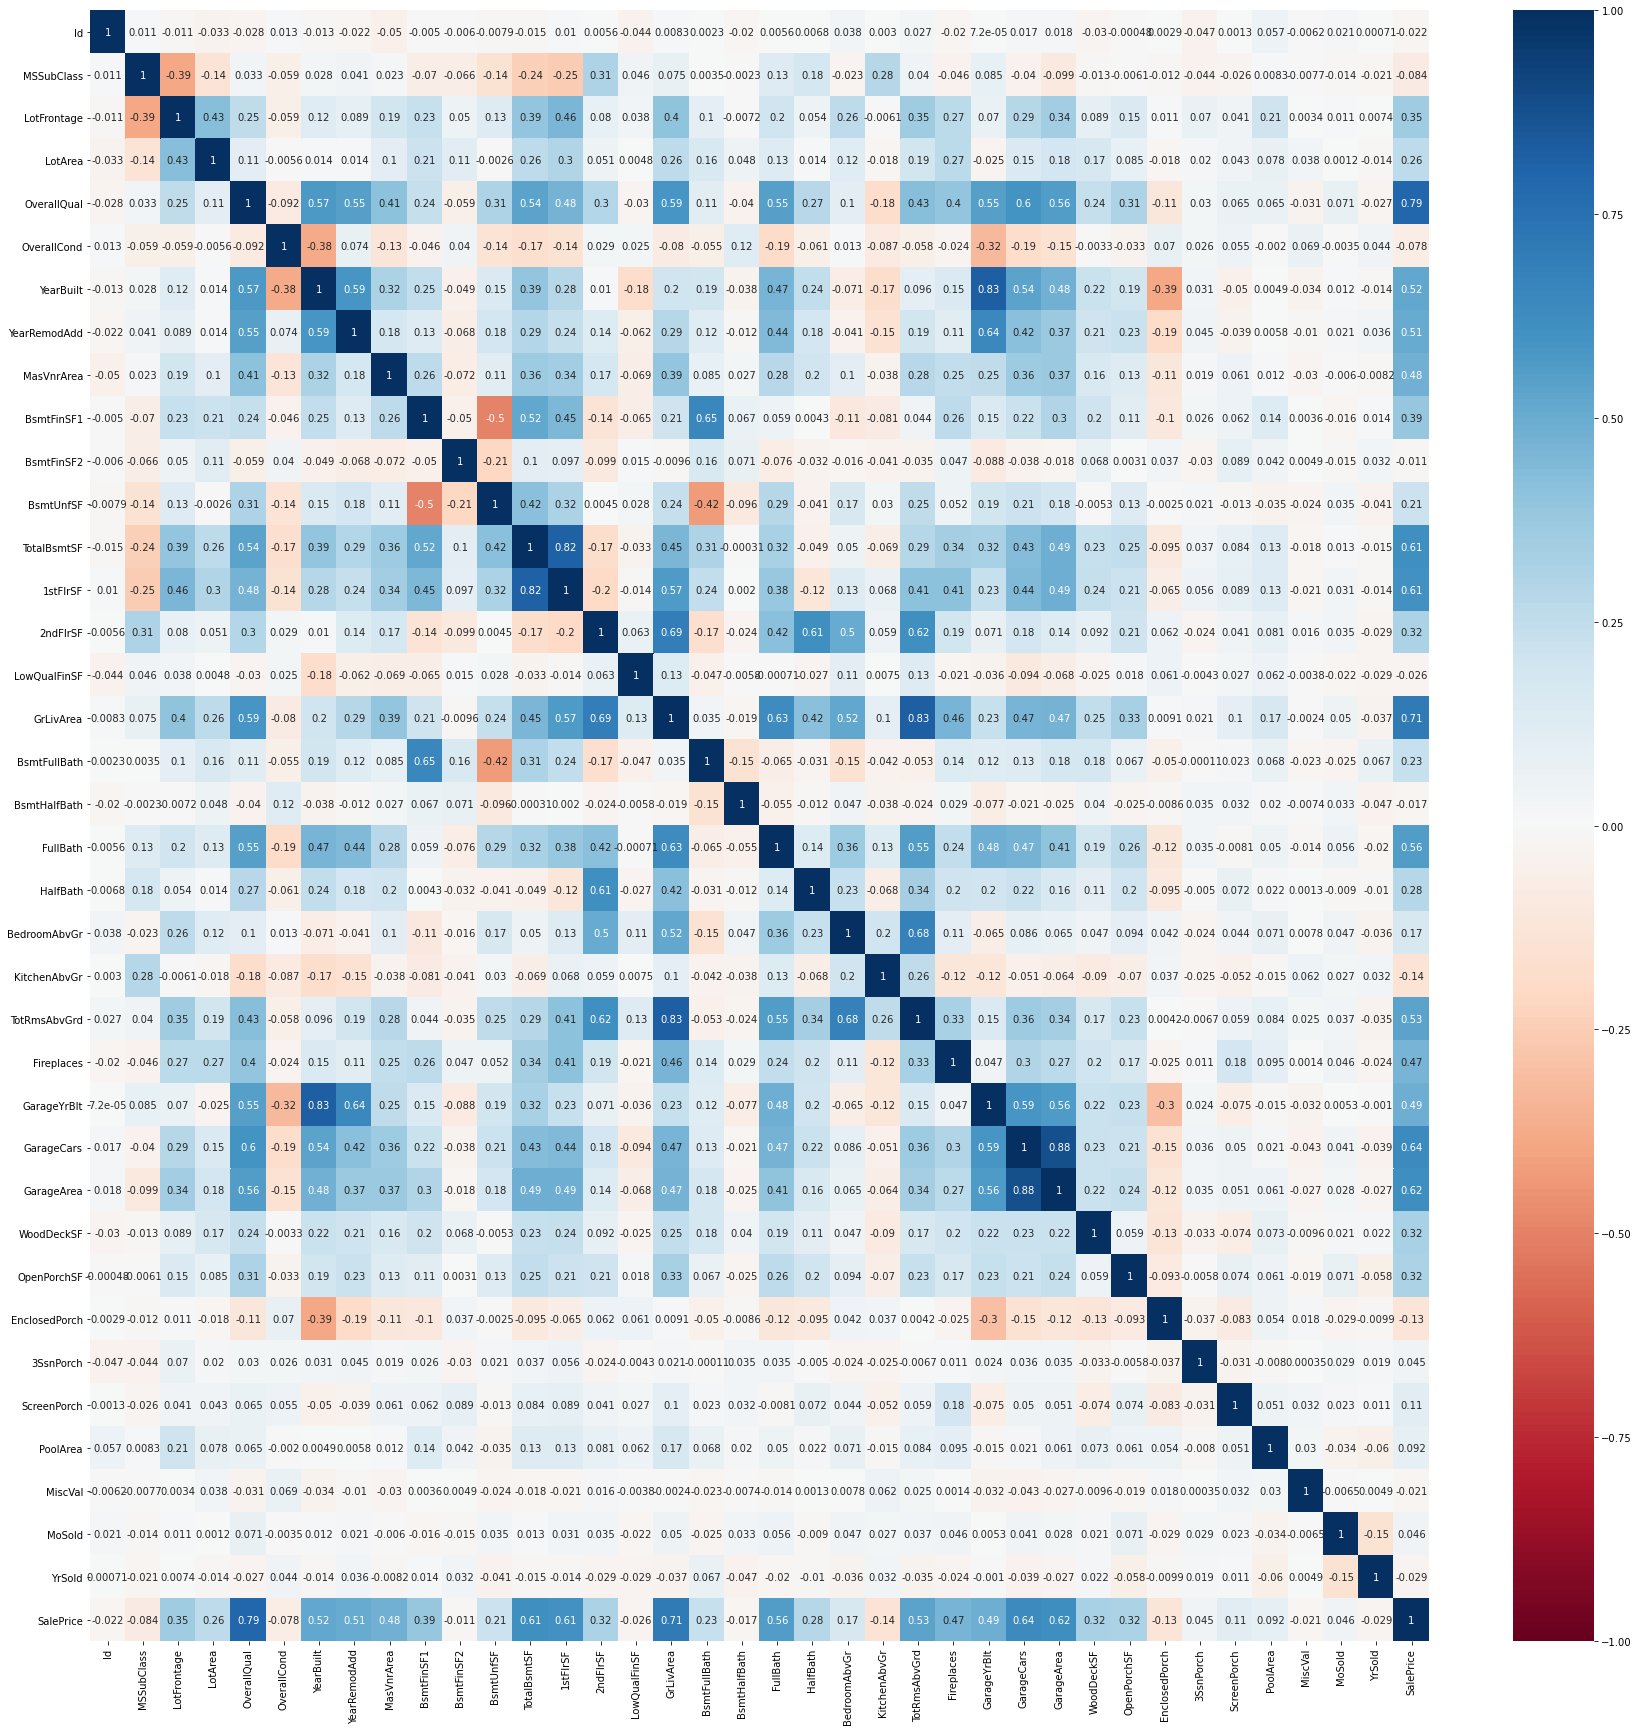

In [7]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(train.corr(method='pearson'),cmap="RdBu", annot=True,ax=ax, vmin=-1, vmax=1, center=0);

In [8]:
mszoning_saleprice_rel = train.groupby(train['MSZoning'])['SalePrice'].agg(['mean','sum','max','min','count'])
mszoning_saleprice_rel

,mean,sum,max,min,count
MSZoning,,,,,
C (all),74528.000000,745280,133900,34900,10
FV,214014.061538,13910914,370878,144152,65
RH,131558.375000,2104934,200000,76000,16
RL,191004.994787,219846749,755000,39300,1151
RM,126316.830275,27537069,475000,37900,218


In [9]:
neighbor_saleprice_rel = train.groupby(train['Neighborhood'])['SalePrice'].agg(['mean','sum','max','min','count'])
neighbor_saleprice_rel

,mean,sum,max,min,count
Neighborhood,,,,,
Blmngtn,194870.882353,3312805,264561,159895,17
Blueste,137500.000000,275000,151000,124000,2
BrDale,104493.750000,1671900,125000,83000,16
BrkSide,124834.051724,7240375,223500,39300,58
ClearCr,212565.428571,5951832,328000,130000,28
CollgCr,197965.773333,29694866,424870,110000,150
Crawfor,210624.725490,10741861,392500,90350,51
Edwards,128219.700000,12821970,320000,58500,100
Gilbert,192854.506329,15235506,377500,141000,79


### Handling Outliers

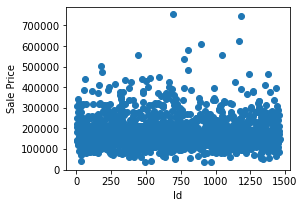

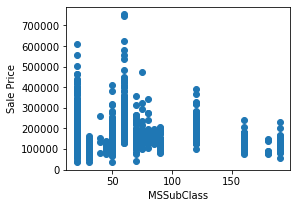

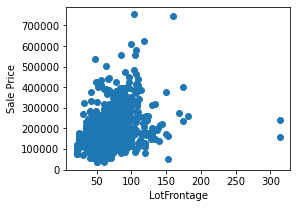

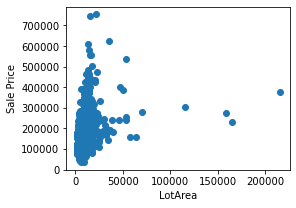

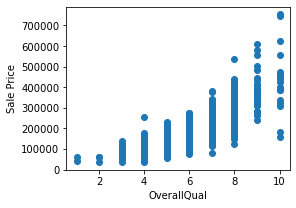

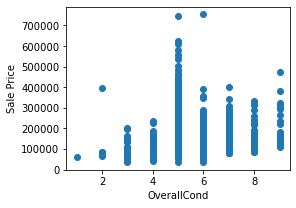

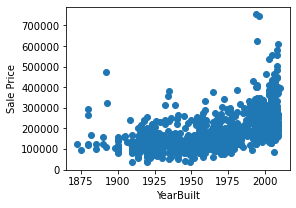

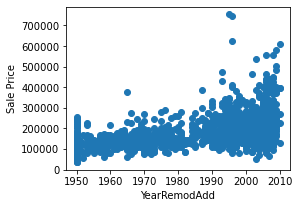

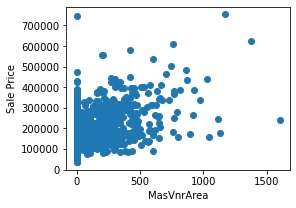

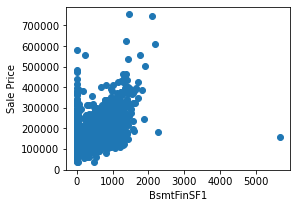

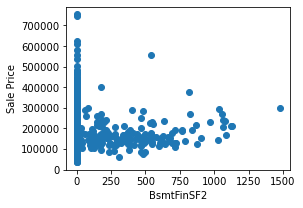

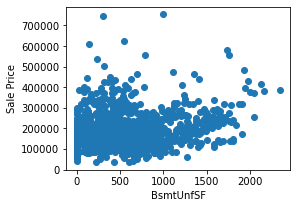

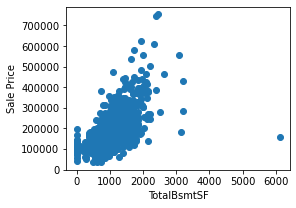

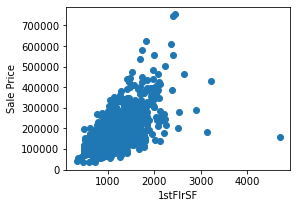

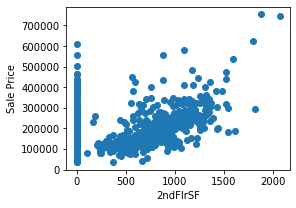

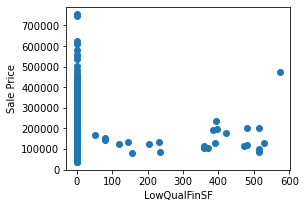

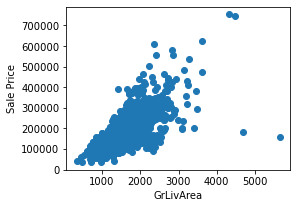

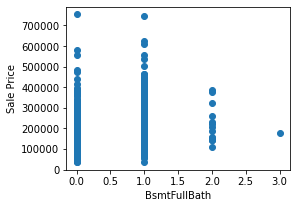

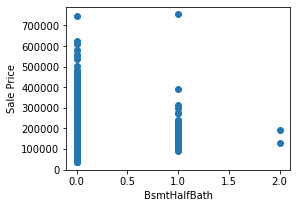

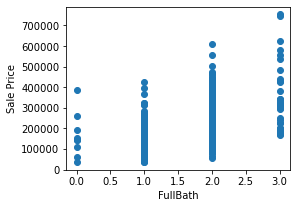

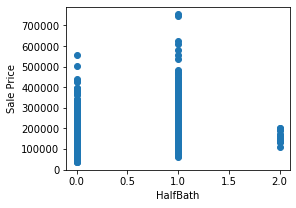

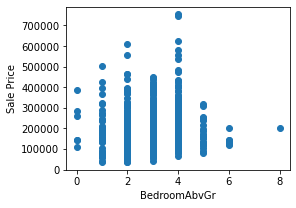

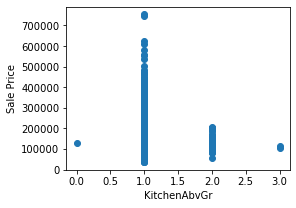

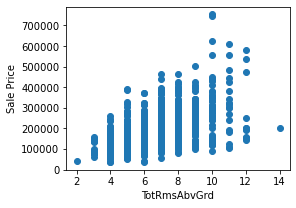

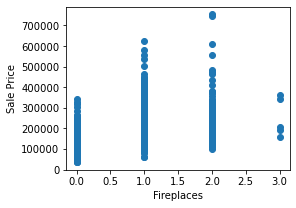

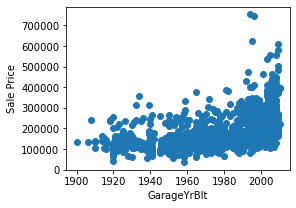

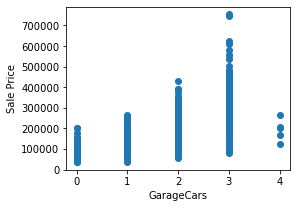

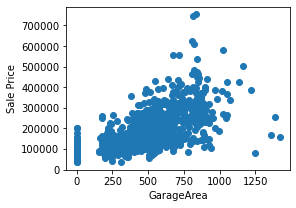

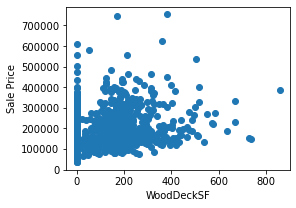

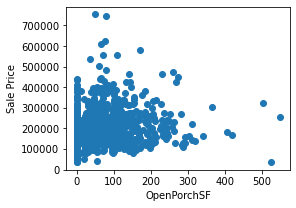

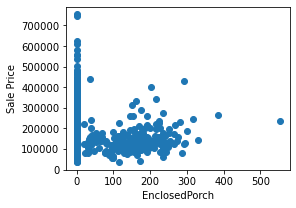

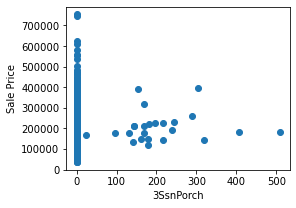

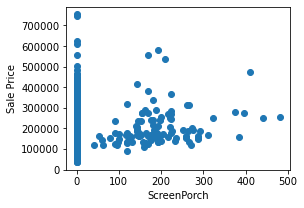

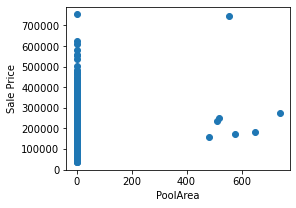

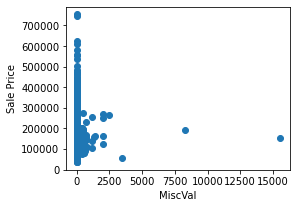

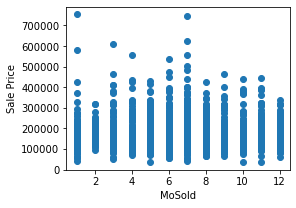

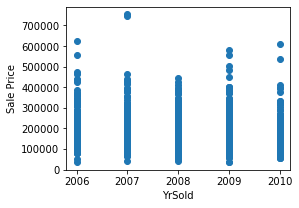

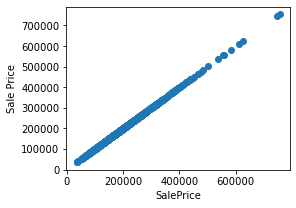

In [10]:
for col in train._get_numeric_data().columns:
    fig, ax = plt.subplots(figsize=(4,3))
    ax.scatter(train[col], train['SalePrice'])
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')
    plt.show()

In [11]:
train = train.drop(train[(train['LotFrontage']>200)].index)
train = train.drop(train[(train['LotArea']>100000)].index)
train = train.drop(train[(train['MasVnrArea']>1200)].index)
train = train.drop(train[(train['BsmtFinSF1']>3000)].index)
train = train.drop(train[(train['BsmtFinSF2']>1300)].index)
train = train.drop(train[(train['TotalBsmtSF']>4000)].index)
train = train.drop(train[(train['1stFlrSF']>4000)].index)
train = train.drop(train[(train['LowQualFinSF']>550)].index)
train = train.drop(train[(train['GrLivArea']>4000)].index)
train = train.drop(train[(train['GarageArea']>1250)].index)
train = train.drop(train[(train['WoodDeckSF']>800)].index)
train = train.drop(train[(train['OpenPorchSF']>450)].index)
train = train.drop(train[(train['EnclosedPorch']>500)].index)
train = train.drop(train[(train['3SsnPorch']>400)].index)
train = train.drop(train[(train['MiscVal']>7500)].index)


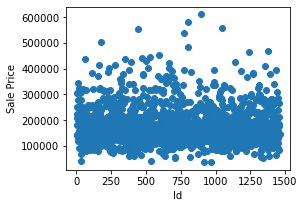

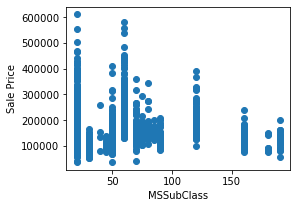

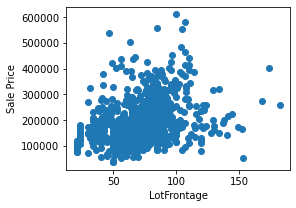

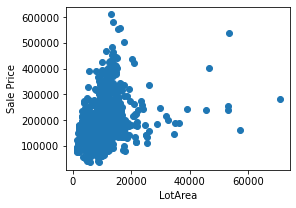

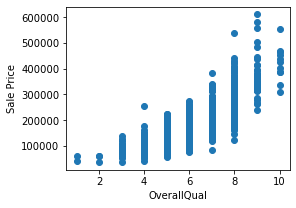

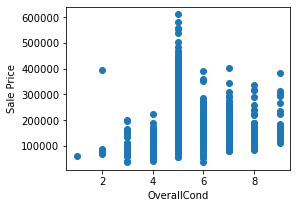

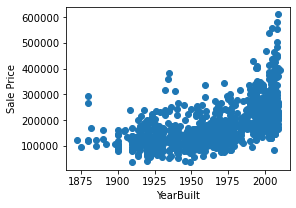

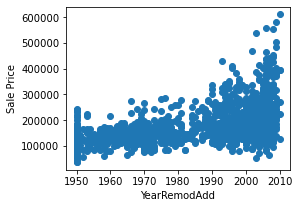

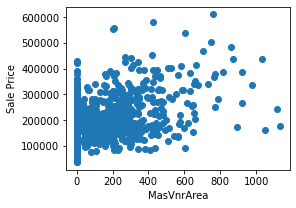

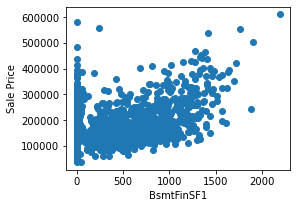

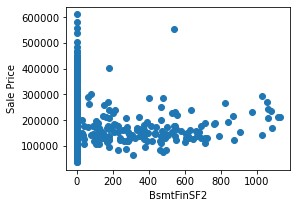

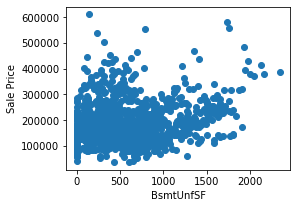

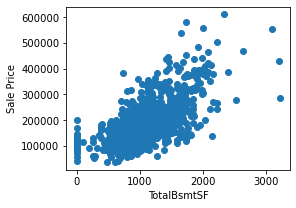

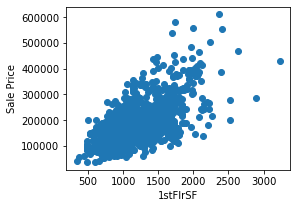

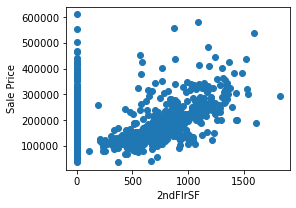

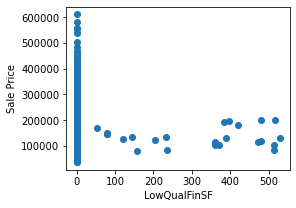

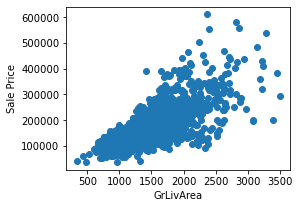

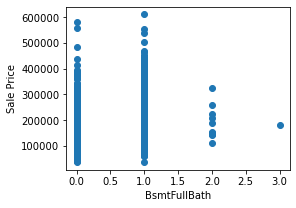

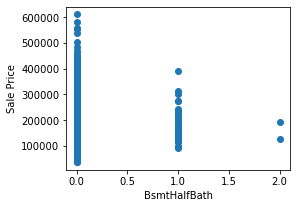

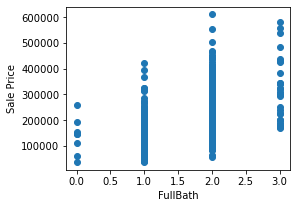

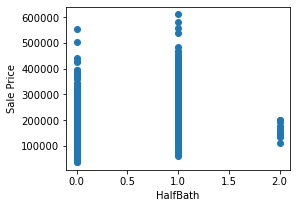

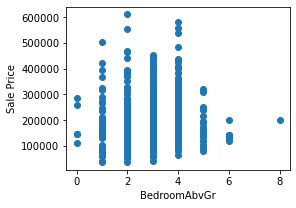

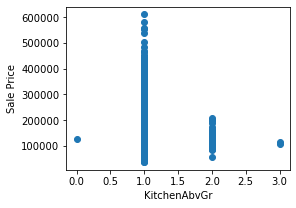

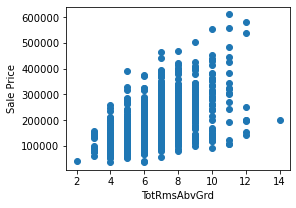

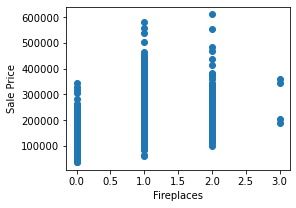

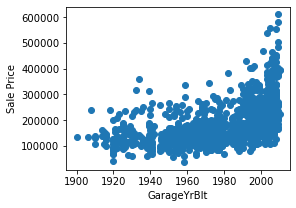

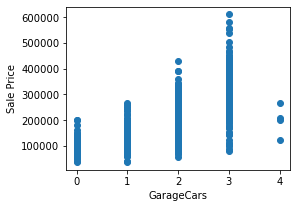

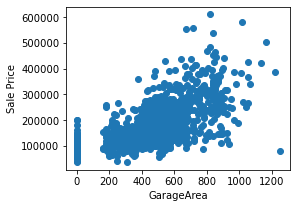

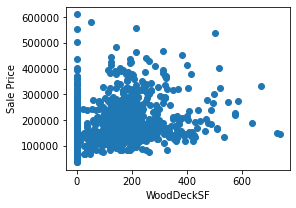

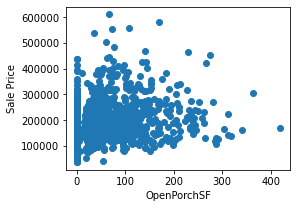

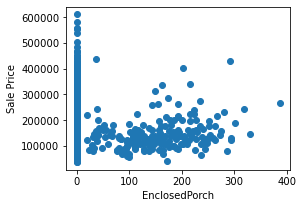

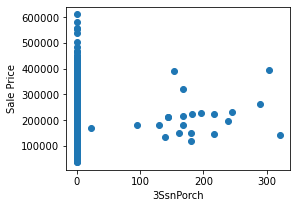

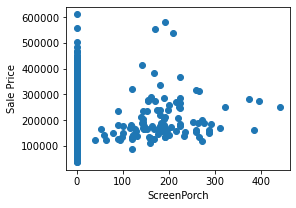

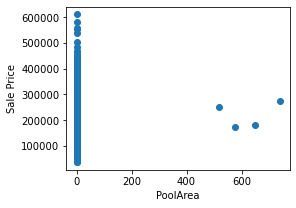

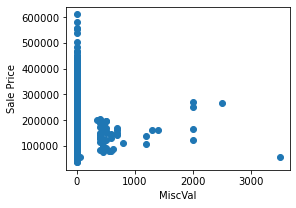

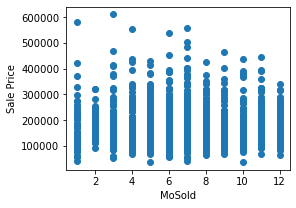

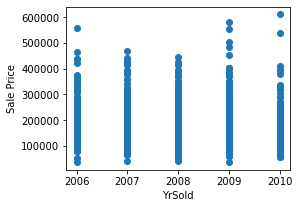

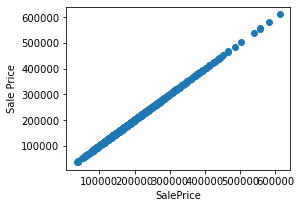

In [12]:
for col in train._get_numeric_data().columns:
    fig, ax = plt.subplots(figsize=(4,3))
    ax.scatter(train[col], train['SalePrice'])
    ax.set_xlabel(col)
    ax.set_ylabel('Sale Price')
    plt.show()

In [13]:
y = pd.DataFrame(train['SalePrice'])
train.drop(['SalePrice'], axis = 1, inplace = True)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

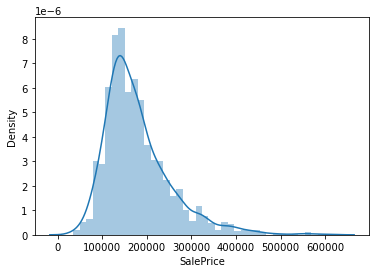

In [14]:
sns.distplot(y['SalePrice'], kde = True)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

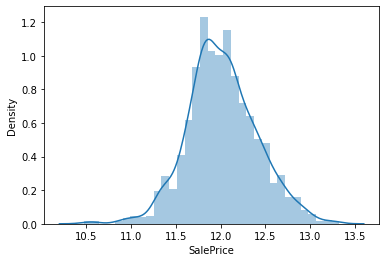

In [15]:
sns.distplot(np.log(y['SalePrice']), kde = True)

In [16]:
y = pd.DataFrame(np.log(y['SalePrice']))

In [17]:
dataset = pd.concat([train,test])
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [18]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2895.000000,2895.000000,2415.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2872.000000,2894.000000,...,2894.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000
mean,1467.098100,57.126079,68.884886,9870.476339,6.077720,5.563385,1971.356131,1984.232124,100.468663,436.506220,...,470.841396,93.055613,46.767530,23.009326,2.307772,15.819689,1.736097,42.214508,6.210708,2007.795855
std,841.789624,42.493704,22.012198,5078.593924,1.398676,1.110688,30.256116,20.915997,173.834587,441.812428,...,213.049037,125.095974,65.410253,63.662842,22.244035,55.149749,31.747973,466.802304,2.714564,1.317097
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,741.500000,20.000000,58.000000,7443.500000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,...,319.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1472.000000,50.000000,68.000000,9400.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,365.500000,...,478.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2195.500000,70.000000,80.000000,11496.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,732.000000,...,576.000000,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Handling Null Data

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2895 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2895 non-null   int64  
 1   MSSubClass     2895 non-null   int64  
 2   MSZoning       2891 non-null   object 
 3   LotFrontage    2415 non-null   float64
 4   LotArea        2895 non-null   int64  
 5   Street         2895 non-null   object 
 6   Alley          196 non-null    object 
 7   LotShape       2895 non-null   object 
 8   LandContour    2895 non-null   object 
 9   Utilities      2893 non-null   object 
 10  LotConfig      2895 non-null   object 
 11  LandSlope      2895 non-null   object 
 12  Neighborhood   2895 non-null   object 
 13  Condition1     2895 non-null   object 
 14  Condition2     2895 non-null   object 
 15  BldgType       2895 non-null   object 
 16  HouseStyle     2895 non-null   object 
 17  OverallQual    2895 non-null   int64  
 18  OverallC

In [20]:
percent_missing = (dataset.isnull().sum()*100/len(dataset))
print(percent_missing.to_string())

Id                0.000000
MSSubClass        0.000000
MSZoning          0.138169
LotFrontage      16.580311
LotArea           0.000000
Street            0.000000
Alley            93.229706
LotShape          0.000000
LandContour       0.000000
Utilities         0.069085
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034542
Exterior2nd       0.034542
MasVnrType        0.829016
MasVnrArea        0.794473
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.797927
BsmtCond          2.832470
BsmtExposure      2.832470
BsmtFinType1      2.728843
BsmtFinSF1        0.034542
BsmtFinType2      2.763385
BsmtFinSF2        0.034542
B

In [21]:
#dataset.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)


In [22]:
dataset['PoolQC'].replace(np.nan, 'None', inplace=True)
dataset['Alley'].replace(np.nan, 'None', inplace=True)
dataset['Fence'].replace(np.nan, 'None', inplace=True)
dataset['MiscFeature'].replace(np.nan, 'None', inplace=True)
dataset['FireplaceQu'].replace(np.nan, 'None', inplace=True)
dataset['GarageType'].replace(np.nan, 'None', inplace=True)
dataset['GarageFinish'].replace(np.nan, 'None', inplace=True)
dataset['GarageQual'].replace(np.nan, 'None', inplace=True)
dataset['GarageCond'].replace(np.nan, 'None', inplace=True)
dataset['BsmtQual'].replace(np.nan, 'None', inplace=True)
dataset['BsmtCond'].replace(np.nan, 'None', inplace=True)
dataset['BsmtExposure'].replace(np.nan, 'None', inplace=True)
dataset['BsmtFinType1'].replace(np.nan, 'None', inplace=True)
dataset['BsmtFinType2'].replace(np.nan, 'None', inplace=True)

dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [23]:
dataset["LotFrontage"] = dataset["LotFrontage"].replace(np.NaN, dataset["LotFrontage"].mean())
dataset["BsmtFullBath"] = dataset["BsmtFullBath"].replace(np.NaN, dataset["BsmtFullBath"].mean())
dataset["BsmtHalfBath"] = dataset["BsmtHalfBath"].replace(np.NaN, dataset["BsmtHalfBath"].mean())
dataset["MasVnrArea"] = dataset["MasVnrArea"].replace(np.NaN, dataset["MasVnrArea"].mean())

In [24]:
dataset["SaleType"] = dataset["SaleType"].replace(np.NaN, dataset['SaleType'].mode()[0][:])
dataset["Functional"] = dataset["Functional"].replace(np.NaN, dataset['Functional'].mode()[0][:])
dataset["KitchenQual"] = dataset["KitchenQual"].replace(np.NaN, dataset['KitchenQual'].mode()[0][:])
dataset["Electrical"] = dataset["Electrical"].replace(np.NaN, dataset['Electrical'].mode()[0][:])
dataset["SaleType"] = dataset["SaleType"].replace(np.NaN, dataset['SaleType'].mode()[0][:])
dataset["MasVnrType"] = dataset["MasVnrType"].replace(np.NaN, dataset['MasVnrType'].mode()[0][:])
dataset["Exterior1st"] = dataset["Exterior1st"].replace(np.NaN, dataset['Exterior1st'].mode()[0][:])
dataset["Exterior2nd"] = dataset["Exterior2nd"].replace(np.NaN, dataset['Exterior2nd'].mode()[0][:])
dataset["MSZoning"] = dataset["MSZoning"].replace(np.NaN, dataset['MSZoning'].mode()[0][:])
dataset["Utilities"] = dataset["Utilities"].replace(np.NaN, dataset['Utilities'].mode()[0][:])

In [25]:
dataset['BsmtFinSF1'].replace(np.nan, 0, regex=True, inplace=True)
dataset['BsmtFinSF2'].replace(np.nan, 0, regex=True, inplace=True)
dataset['TotalBsmtSF'].replace(np.nan, 0, regex=True, inplace=True)
dataset['BsmtUnfSF'].replace(np.nan, 0, regex=True, inplace=True)
dataset['GarageYrBlt'].replace(np.nan, 0, regex=True, inplace=True)
dataset['GarageCars'].replace(np.nan, 0, regex=True, inplace=True)
dataset['GarageArea'].replace(np.nan, 0, regex=True, inplace=True)


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2895 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2895 non-null   int64  
 1   MSSubClass     2895 non-null   int64  
 2   MSZoning       2895 non-null   object 
 3   LotFrontage    2895 non-null   float64
 4   LotArea        2895 non-null   int64  
 5   Street         2895 non-null   object 
 6   Alley          2895 non-null   object 
 7   LotShape       2895 non-null   object 
 8   LandContour    2895 non-null   object 
 9   Utilities      2895 non-null   object 
 10  LotConfig      2895 non-null   object 
 11  LandSlope      2895 non-null   object 
 12  Neighborhood   2895 non-null   object 
 13  Condition1     2895 non-null   object 
 14  Condition2     2895 non-null   object 
 15  BldgType       2895 non-null   object 
 16  HouseStyle     2895 non-null   object 
 17  OverallQual    2895 non-null   int64  
 18  OverallC

### Manipulating Data

In [27]:
ordinal_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'PoolQC', 'FireplaceQu']

ordinal_map={
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None' :0,
}

for feature in ordinal_features:
    dataset[feature] = dataset[feature].map(ordinal_map)


In [28]:
ordinal_map1={
    'Gd': 4,
    'Av': 3,
    'Mn': 2,
    'No': 1,
    'None' :0,
}

dataset['BsmtExposure'] = dataset['BsmtExposure'].map(ordinal_map1)

In [29]:
ordinal_map2={
    'Y': 3,
    'P': 2,
    'N': 1,
}
dataset['PavedDrive'] = dataset['PavedDrive'].map(ordinal_map2)

In [30]:
ordinal_map3={
    'Fin': 3,
    'RFn': 2,
    'Unf': 1,
    'None':0
}
dataset['GarageFinish'] = dataset['GarageFinish'].map(ordinal_map3)

In [31]:
dataset.drop(["Id"], axis=1, inplace=True)
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,0,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,0,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,0,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,0,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,Shed,700,7,2006,WD,Normal


In [32]:
dataset['TotalPorch'] =  dataset['OpenPorchSF'] + dataset['3SsnPorch']+ dataset['ScreenPorch'] + dataset['EnclosedPorch']
dataset.drop(['OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'EnclosedPorch'], axis=1, inplace=True)
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalPorch
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,0,2,2008,WD,Normal,61
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,0,9,2008,WD,Normal,42
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,0,2,2006,WD,Abnorml,307
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,0,12,2008,WD,Normal,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,0,6,2006,WD,Normal,0
1455,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,0,4,2006,WD,Abnorml,24
1456,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,0,9,2006,WD,Abnorml,0
1457,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,32


In [33]:
dataset['TotalSqFeet'] = dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['TotalBsmtSF'] 
dataset.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis=1, inplace=True)


In [34]:
dataset['TotalBath'] = dataset['FullBath'] + (0.5 * dataset['HalfBath']) + dataset['BsmtFullBath'] + (0.5 * dataset['BsmtHalfBath'])
dataset.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)


In [35]:
dataset.isnull().sum().sum()


0

In [36]:
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

In [37]:
num_cols = dataset._get_numeric_data().columns 
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'HeatingQC', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'PoolArea', 'PoolQC', 'MiscVal', 'MoSold', 'YrSold', 'TotalPorch',
       'TotalSqFeet', 'TotalBath'],
      dtype='object')

In [38]:
cat_cols = dataset.columns.difference(num_cols)
cat_cols

Index(['Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'Foundation', 'Functional', 'GarageType', 'Heating',
       'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities'],
      dtype='object')

In [39]:
num_data = dataset.loc[:, num_cols]
cat_data = dataset.loc[:, cat_cols]
print(num_data.shape)
print(cat_data.shape)


(2895, 40)
(2895, 31)


In [40]:
nandata=num_data.isnull().sum()
nandata

LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
HeatingQC       0
LowQualFinSF    0
GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
PavedDrive      0
WoodDeckSF      0
PoolArea        0
PoolQC          0
MiscVal         0
MoSold          0
YrSold          0
TotalPorch      0
TotalSqFeet     0
TotalBath       0
dtype: int64

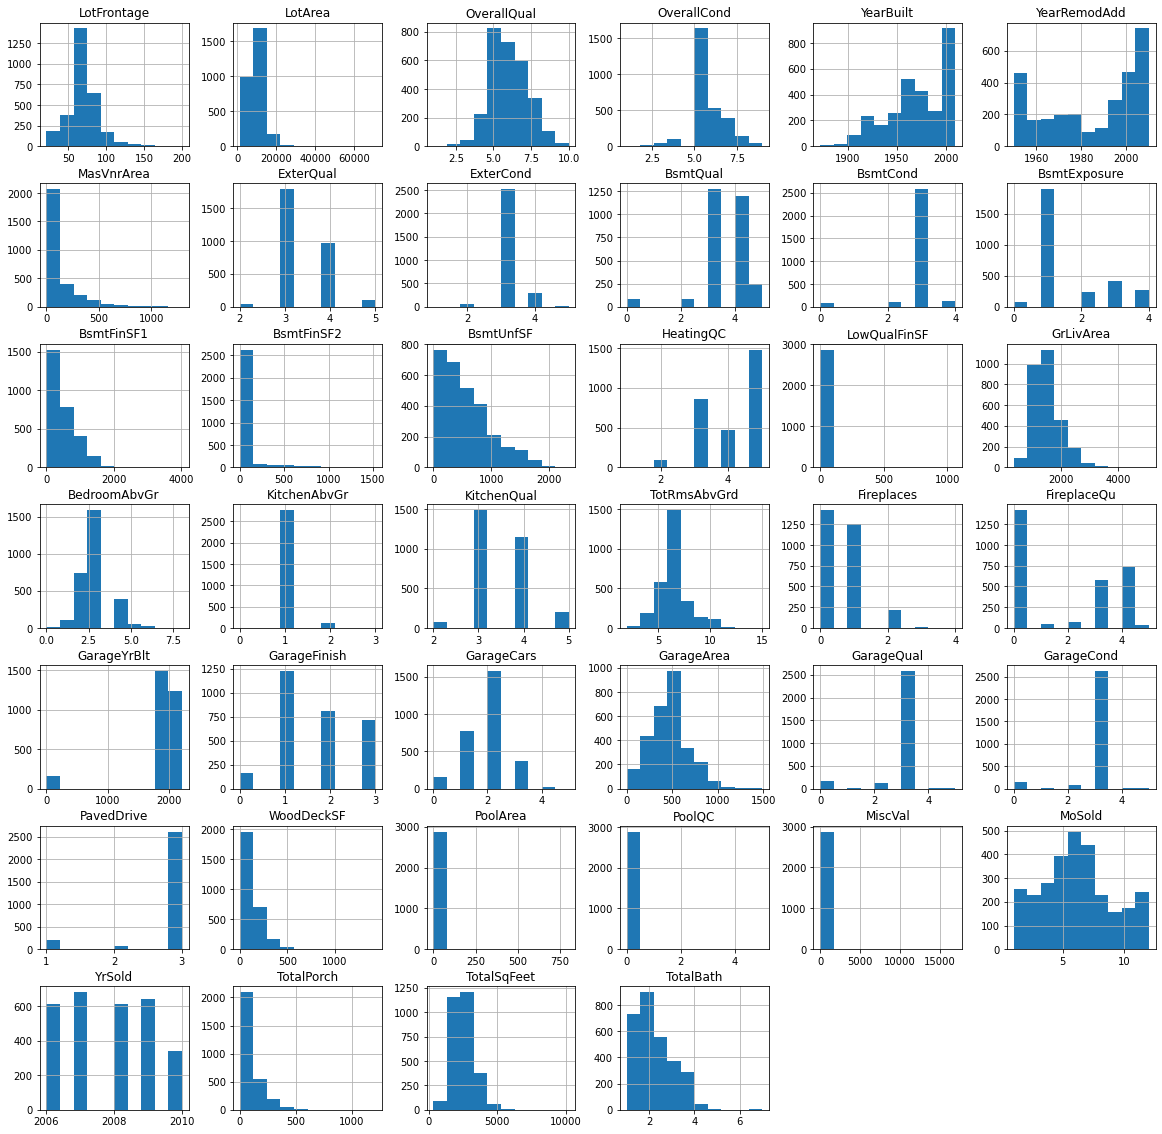

In [41]:
num_data.hist(figsize=[20,20])
plt.show()

In [42]:
# from sklearn.preprocessing import power_transform
# num_data = pd.DataFrame(power_transform(num_data, method='yeo-johnson', standardize=True, copy=True),columns = num_data.columns)
# num_data


### Handling Skewed Data

In [43]:
from scipy import stats
from scipy.stats import norm, skew 
skewed_cols = num_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_cols})
skewness

,Skew
MiscVal,25.355184
PoolQC,22.514120
PoolArea,19.769617
LowQualFinSF,12.632326
KitchenAbvGr,4.300072
BsmtFinSF2,4.101429
LotArea,3.605913
MasVnrArea,2.432625
TotalPorch,2.065038
WoodDeckSF,1.807397


In [44]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
 
from scipy.special import boxcox1p  
skewed_cols = skewness.index
for col in skewed_cols:
     num_data[col] = boxcox1p(num_data[col], 0.15)

In [45]:
nandata=num_data.isnull().sum()
nandata

LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
HeatingQC       0
LowQualFinSF    0
GrLivArea       0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
PavedDrive      0
WoodDeckSF      0
PoolArea        0
PoolQC          0
MiscVal         0
MoSold          0
YrSold          0
TotalPorch      0
TotalSqFeet     0
TotalBath       0
dtype: int64

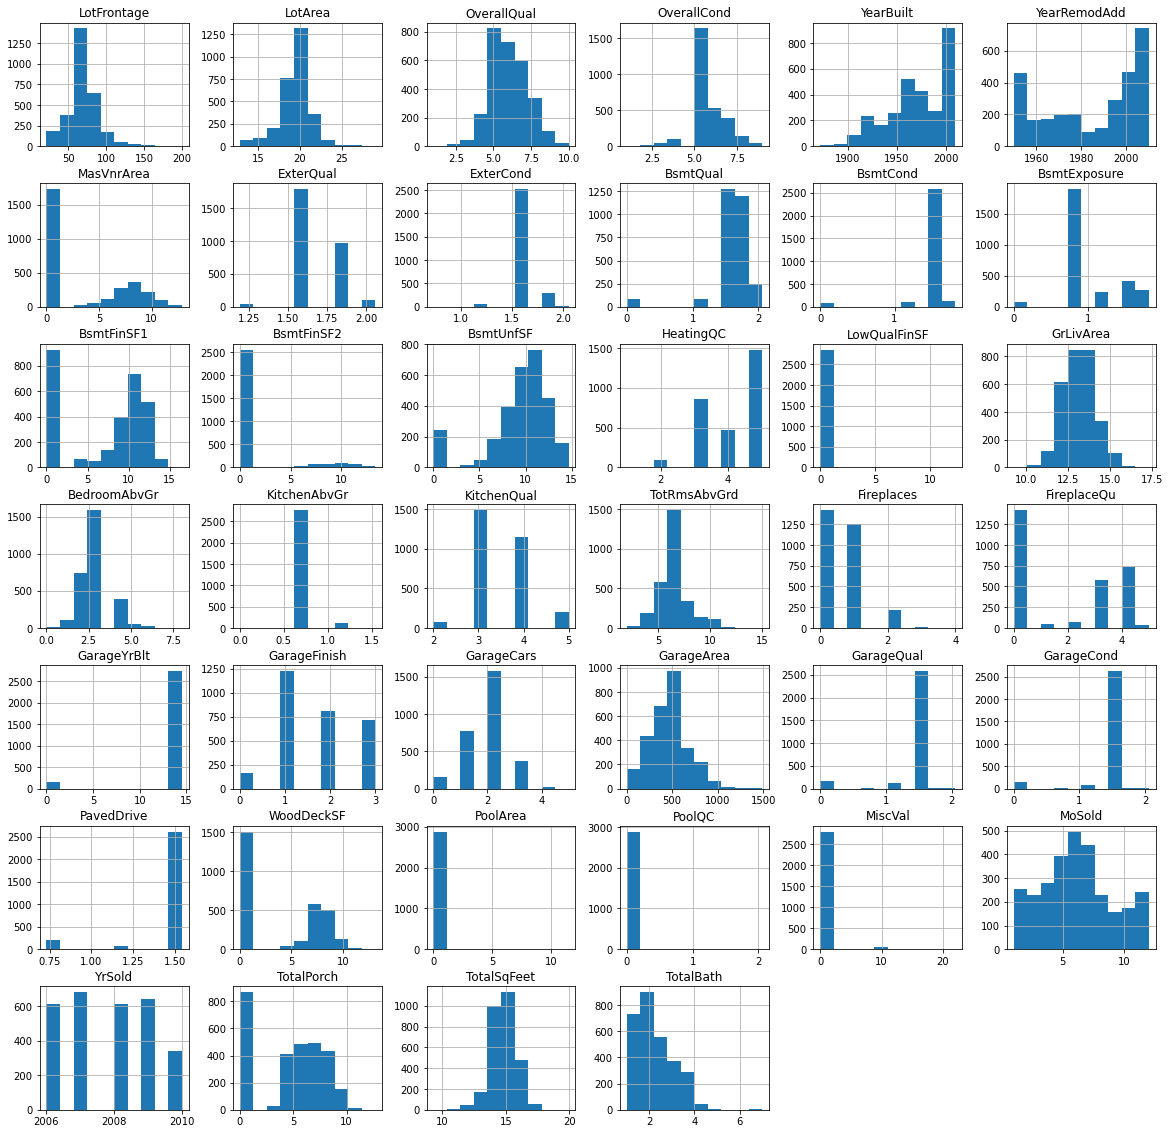

In [46]:
num_data.hist(figsize=[20,20])
plt.show()

### Scaling Data

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_data = pd.DataFrame(sc.fit_transform(num_data),columns = num_data.columns)


In [48]:
nandata=num_data.isnull().sum().sum()
nandata

0

In [49]:
cat_data = pd.get_dummies(cat_data)
cat_data

,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType1_ALQ,BsmtFinType1_BLQ,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1455,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1456,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
1457,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [50]:
num_data.reset_index(drop=True, inplace=True)
cat_data.reset_index(drop=True, inplace=True)

final_dataset = pd.concat([num_data, cat_data], axis = 1)

final_dataset

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,-0.193273,-0.127763,0.659509,-0.507327,1.046048,0.897453,1.172863,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
1,0.552976,0.137609,-0.055577,2.194168,0.153512,-0.393648,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
2,-0.044023,0.474635,0.659509,-0.507327,0.979934,0.849634,1.072309,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
3,-0.442022,0.126648,0.659509,-0.507327,-1.862958,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
4,0.751975,0.993635,1.374595,-0.507327,0.946877,0.753997,1.497664,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,-2.382268,-2.850755,-1.485748,1.293669,-0.044829,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2891,-2.382268,-2.886903,-1.485748,-0.507327,-0.044829,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2892,4.532968,1.766839,-0.770662,1.293669,-0.375398,0.562723,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2893,-0.342522,0.315056,-0.770662,-0.507327,0.682422,0.371449,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0


In [51]:
final_train = final_dataset.loc[:1435,]
final_test = final_dataset.loc[1436:,]
print(final_train.shape)
print(final_test.shape)

(1436, 258)
(1459, 258)


In [52]:
final_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,-0.193273,-0.127763,0.659509,-0.507327,1.046048,0.897453,1.172863,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
1,0.552976,0.137609,-0.055577,2.194168,0.153512,-0.393648,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
2,-0.044023,0.474635,0.659509,-0.507327,0.979934,0.849634,1.072309,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
3,-0.442022,0.126648,0.659509,-0.507327,-1.862958,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
4,0.751975,0.993635,1.374595,-0.507327,0.946877,0.753997,1.497664,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.342522,-0.261321,-0.055577,-0.507327,0.913820,0.753997,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
1432,0.801725,0.818343,-0.055577,0.393171,0.219626,0.180174,0.915683,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
1433,-0.143523,0.012433,0.659509,3.094666,-1.003479,1.040908,-0.791276,2.556073,2.364038,-0.316498,...,0,0,0,0,0,1,0,1,1,0
1434,-0.044023,0.163068,-0.770662,0.393171,-0.705967,0.562723,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0


In [53]:
final_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
1436,0.552976,0.544760,-0.770662,0.393171,-0.342341,-1.110927,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
1437,0.602726,0.994729,-0.055577,0.393171,-0.441512,-1.254382,0.867979,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
1438,0.254476,0.925568,-0.770662,-0.507327,0.847706,0.658360,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
1439,0.453476,0.218935,-0.055577,0.393171,0.880763,0.658360,0.149177,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
1440,-1.287771,-1.165281,1.374595,-0.507327,0.682422,0.371449,-0.791276,1.078748,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890,-2.382268,-2.850755,-1.485748,1.293669,-0.044829,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2891,-2.382268,-2.886903,-1.485748,-0.507327,-0.044829,-0.680560,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2892,4.532968,1.766839,-0.770662,1.293669,-0.375398,0.562723,-0.791276,-0.675224,-0.195792,-0.316498,...,0,0,0,0,0,1,0,1,1,0
2893,-0.342522,0.315056,-0.770662,-0.507327,0.682422,0.371449,-0.791276,-0.675224,-0.195792,0.510872,...,0,0,0,0,0,1,0,1,1,0


### Training and Testing Models 

In [54]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(final_train, y, test_size=0.2, random_state=0)

In [55]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge



In [56]:
cat = CatBoostRegressor(learning_rate=0.02,iterations=4000, depth=6, l2_leaf_reg=2 )

cat.fit(X_train,y_train)

cat_train_pred = cat.predict(X_train)
cat_test_pred = cat.predict(X_test)

cat_train_rmse = mean_squared_error(y_train, cat_train_pred, squared=False)
cat_test_rmse = mean_squared_error(y_test, cat_test_pred, squared=False)

print("Train RMSE: ", cat_train_rmse)
print("Test RMSE: ", cat_test_rmse)

0:	learn: 0.3872700	total: 162ms	remaining: 10m 49s
1:	learn: 0.3820493	total: 167ms	remaining: 5m 32s
2:	learn: 0.3770296	total: 171ms	remaining: 3m 47s
3:	learn: 0.3722906	total: 174ms	remaining: 2m 53s
4:	learn: 0.3673222	total: 177ms	remaining: 2m 21s
5:	learn: 0.3623460	total: 180ms	remaining: 2m
6:	learn: 0.3577554	total: 184ms	remaining: 1m 44s
7:	learn: 0.3529935	total: 187ms	remaining: 1m 33s
8:	learn: 0.3482645	total: 191ms	remaining: 1m 24s
9:	learn: 0.3437305	total: 195ms	remaining: 1m 17s
10:	learn: 0.3393603	total: 199ms	remaining: 1m 12s
11:	learn: 0.3351090	total: 202ms	remaining: 1m 7s
12:	learn: 0.3309603	total: 207ms	remaining: 1m 3s
13:	learn: 0.3268908	total: 211ms	remaining: 1m
14:	learn: 0.3225809	total: 214ms	remaining: 56.9s
15:	learn: 0.3185174	total: 219ms	remaining: 54.5s
16:	learn: 0.3148320	total: 222ms	remaining: 52.1s
17:	learn: 0.3111773	total: 226ms	remaining: 50s
18:	learn: 0.3074089	total: 229ms	remaining: 48.1s
19:	learn: 0.3035983	total: 233ms	rema

188:	learn: 0.1144362	total: 856ms	remaining: 17.3s
189:	learn: 0.1142021	total: 860ms	remaining: 17.2s
190:	learn: 0.1140427	total: 863ms	remaining: 17.2s
191:	learn: 0.1138196	total: 867ms	remaining: 17.2s
192:	learn: 0.1135644	total: 871ms	remaining: 17.2s
193:	learn: 0.1133408	total: 875ms	remaining: 17.2s
194:	learn: 0.1131345	total: 879ms	remaining: 17.1s
195:	learn: 0.1129016	total: 882ms	remaining: 17.1s
196:	learn: 0.1126965	total: 886ms	remaining: 17.1s
197:	learn: 0.1125404	total: 890ms	remaining: 17.1s
198:	learn: 0.1123115	total: 894ms	remaining: 17.1s
199:	learn: 0.1121280	total: 897ms	remaining: 17s
200:	learn: 0.1119068	total: 901ms	remaining: 17s
201:	learn: 0.1116713	total: 905ms	remaining: 17s
202:	learn: 0.1114936	total: 909ms	remaining: 17s
203:	learn: 0.1113158	total: 913ms	remaining: 17s
204:	learn: 0.1111138	total: 916ms	remaining: 17s
205:	learn: 0.1108583	total: 920ms	remaining: 16.9s
206:	learn: 0.1106700	total: 924ms	remaining: 16.9s
207:	learn: 0.1105131	to

380:	learn: 0.0901483	total: 1.56s	remaining: 14.9s
381:	learn: 0.0900792	total: 1.57s	remaining: 14.8s
382:	learn: 0.0899705	total: 1.57s	remaining: 14.8s
383:	learn: 0.0898930	total: 1.57s	remaining: 14.8s
384:	learn: 0.0898103	total: 1.58s	remaining: 14.8s
385:	learn: 0.0897372	total: 1.58s	remaining: 14.8s
386:	learn: 0.0896367	total: 1.58s	remaining: 14.8s
387:	learn: 0.0895664	total: 1.59s	remaining: 14.8s
388:	learn: 0.0894968	total: 1.59s	remaining: 14.8s
389:	learn: 0.0894349	total: 1.59s	remaining: 14.8s
390:	learn: 0.0893575	total: 1.6s	remaining: 14.8s
391:	learn: 0.0892454	total: 1.6s	remaining: 14.7s
392:	learn: 0.0891714	total: 1.6s	remaining: 14.7s
393:	learn: 0.0891135	total: 1.61s	remaining: 14.7s
394:	learn: 0.0890548	total: 1.61s	remaining: 14.7s
395:	learn: 0.0889860	total: 1.61s	remaining: 14.7s
396:	learn: 0.0889060	total: 1.62s	remaining: 14.7s
397:	learn: 0.0888049	total: 1.62s	remaining: 14.7s
398:	learn: 0.0886794	total: 1.62s	remaining: 14.7s
399:	learn: 0.0

553:	learn: 0.0778994	total: 2.27s	remaining: 14.1s
554:	learn: 0.0778589	total: 2.27s	remaining: 14.1s
555:	learn: 0.0777985	total: 2.28s	remaining: 14.1s
556:	learn: 0.0777772	total: 2.28s	remaining: 14.1s
557:	learn: 0.0777224	total: 2.29s	remaining: 14.1s
558:	learn: 0.0776557	total: 2.29s	remaining: 14.1s
559:	learn: 0.0775921	total: 2.29s	remaining: 14.1s
560:	learn: 0.0775347	total: 2.3s	remaining: 14.1s
561:	learn: 0.0774647	total: 2.3s	remaining: 14.1s
562:	learn: 0.0773980	total: 2.3s	remaining: 14.1s
563:	learn: 0.0773605	total: 2.31s	remaining: 14.1s
564:	learn: 0.0772832	total: 2.31s	remaining: 14s
565:	learn: 0.0772092	total: 2.31s	remaining: 14s
566:	learn: 0.0771559	total: 2.32s	remaining: 14s
567:	learn: 0.0771350	total: 2.32s	remaining: 14s
568:	learn: 0.0770759	total: 2.32s	remaining: 14s
569:	learn: 0.0770149	total: 2.33s	remaining: 14s
570:	learn: 0.0769438	total: 2.33s	remaining: 14s
571:	learn: 0.0769161	total: 2.33s	remaining: 14s
572:	learn: 0.0768364	total: 2.

752:	learn: 0.0667595	total: 2.98s	remaining: 12.9s
753:	learn: 0.0667138	total: 2.99s	remaining: 12.9s
754:	learn: 0.0666464	total: 2.99s	remaining: 12.9s
755:	learn: 0.0665780	total: 3s	remaining: 12.9s
756:	learn: 0.0665040	total: 3s	remaining: 12.9s
757:	learn: 0.0664675	total: 3s	remaining: 12.8s
758:	learn: 0.0664528	total: 3.01s	remaining: 12.8s
759:	learn: 0.0664094	total: 3.01s	remaining: 12.8s
760:	learn: 0.0663953	total: 3.01s	remaining: 12.8s
761:	learn: 0.0663595	total: 3.02s	remaining: 12.8s
762:	learn: 0.0663254	total: 3.02s	remaining: 12.8s
763:	learn: 0.0662740	total: 3.02s	remaining: 12.8s
764:	learn: 0.0662222	total: 3.03s	remaining: 12.8s
765:	learn: 0.0661438	total: 3.03s	remaining: 12.8s
766:	learn: 0.0660687	total: 3.03s	remaining: 12.8s
767:	learn: 0.0660035	total: 3.04s	remaining: 12.8s
768:	learn: 0.0659512	total: 3.04s	remaining: 12.8s
769:	learn: 0.0658565	total: 3.04s	remaining: 12.8s
770:	learn: 0.0657907	total: 3.05s	remaining: 12.8s
771:	learn: 0.0657335

914:	learn: 0.0593187	total: 3.51s	remaining: 11.8s
915:	learn: 0.0592748	total: 3.51s	remaining: 11.8s
916:	learn: 0.0592432	total: 3.52s	remaining: 11.8s
917:	learn: 0.0592003	total: 3.52s	remaining: 11.8s
918:	learn: 0.0591375	total: 3.53s	remaining: 11.8s
919:	learn: 0.0590863	total: 3.53s	remaining: 11.8s
920:	learn: 0.0590424	total: 3.53s	remaining: 11.8s
921:	learn: 0.0590354	total: 3.54s	remaining: 11.8s
922:	learn: 0.0590195	total: 3.54s	remaining: 11.8s
923:	learn: 0.0589494	total: 3.54s	remaining: 11.8s
924:	learn: 0.0588992	total: 3.55s	remaining: 11.8s
925:	learn: 0.0588838	total: 3.55s	remaining: 11.8s
926:	learn: 0.0588540	total: 3.55s	remaining: 11.8s
927:	learn: 0.0587876	total: 3.56s	remaining: 11.8s
928:	learn: 0.0587545	total: 3.56s	remaining: 11.8s
929:	learn: 0.0587069	total: 3.56s	remaining: 11.8s
930:	learn: 0.0586790	total: 3.57s	remaining: 11.8s
931:	learn: 0.0586366	total: 3.57s	remaining: 11.8s
932:	learn: 0.0585862	total: 3.58s	remaining: 11.8s
933:	learn: 

1111:	learn: 0.0522426	total: 4.22s	remaining: 11s
1112:	learn: 0.0522224	total: 4.23s	remaining: 11s
1113:	learn: 0.0521804	total: 4.23s	remaining: 11s
1114:	learn: 0.0521403	total: 4.24s	remaining: 11s
1115:	learn: 0.0521152	total: 4.24s	remaining: 11s
1116:	learn: 0.0520920	total: 4.25s	remaining: 11s
1117:	learn: 0.0520567	total: 4.25s	remaining: 11s
1118:	learn: 0.0520309	total: 4.25s	remaining: 10.9s
1119:	learn: 0.0519891	total: 4.26s	remaining: 10.9s
1120:	learn: 0.0519626	total: 4.26s	remaining: 10.9s
1121:	learn: 0.0519218	total: 4.26s	remaining: 10.9s
1122:	learn: 0.0518703	total: 4.27s	remaining: 10.9s
1123:	learn: 0.0518162	total: 4.27s	remaining: 10.9s
1124:	learn: 0.0518060	total: 4.28s	remaining: 10.9s
1125:	learn: 0.0517701	total: 4.28s	remaining: 10.9s
1126:	learn: 0.0517494	total: 4.28s	remaining: 10.9s
1127:	learn: 0.0517371	total: 4.29s	remaining: 10.9s
1128:	learn: 0.0516921	total: 4.29s	remaining: 10.9s
1129:	learn: 0.0516376	total: 4.29s	remaining: 10.9s
1130:	l

1305:	learn: 0.0462304	total: 4.92s	remaining: 10.2s
1306:	learn: 0.0462060	total: 4.93s	remaining: 10.2s
1307:	learn: 0.0461790	total: 4.93s	remaining: 10.2s
1308:	learn: 0.0461619	total: 4.94s	remaining: 10.1s
1309:	learn: 0.0461344	total: 4.94s	remaining: 10.1s
1310:	learn: 0.0460924	total: 4.95s	remaining: 10.1s
1311:	learn: 0.0460517	total: 4.95s	remaining: 10.1s
1312:	learn: 0.0460272	total: 4.95s	remaining: 10.1s
1313:	learn: 0.0460074	total: 4.96s	remaining: 10.1s
1314:	learn: 0.0459802	total: 4.96s	remaining: 10.1s
1315:	learn: 0.0459424	total: 4.97s	remaining: 10.1s
1316:	learn: 0.0459380	total: 4.97s	remaining: 10.1s
1317:	learn: 0.0459141	total: 4.97s	remaining: 10.1s
1318:	learn: 0.0458978	total: 4.98s	remaining: 10.1s
1319:	learn: 0.0458622	total: 4.98s	remaining: 10.1s
1320:	learn: 0.0458385	total: 4.99s	remaining: 10.1s
1321:	learn: 0.0458053	total: 4.99s	remaining: 10.1s
1322:	learn: 0.0457665	total: 5s	remaining: 10.1s
1323:	learn: 0.0457294	total: 5s	remaining: 10.1s

1500:	learn: 0.0412450	total: 5.63s	remaining: 9.38s
1501:	learn: 0.0412205	total: 5.64s	remaining: 9.38s
1502:	learn: 0.0411955	total: 5.64s	remaining: 9.38s
1503:	learn: 0.0411722	total: 5.65s	remaining: 9.37s
1504:	learn: 0.0411447	total: 5.65s	remaining: 9.37s
1505:	learn: 0.0411425	total: 5.66s	remaining: 9.37s
1506:	learn: 0.0411394	total: 5.66s	remaining: 9.36s
1507:	learn: 0.0411136	total: 5.66s	remaining: 9.36s
1508:	learn: 0.0411103	total: 5.66s	remaining: 9.35s
1509:	learn: 0.0411074	total: 5.67s	remaining: 9.35s
1510:	learn: 0.0410698	total: 5.67s	remaining: 9.34s
1511:	learn: 0.0410436	total: 5.67s	remaining: 9.34s
1512:	learn: 0.0410206	total: 5.68s	remaining: 9.33s
1513:	learn: 0.0409833	total: 5.68s	remaining: 9.33s
1514:	learn: 0.0409568	total: 5.68s	remaining: 9.32s
1515:	learn: 0.0409346	total: 5.69s	remaining: 9.32s
1516:	learn: 0.0409048	total: 5.69s	remaining: 9.32s
1517:	learn: 0.0408778	total: 5.7s	remaining: 9.31s
1518:	learn: 0.0408532	total: 5.7s	remaining: 9

1709:	learn: 0.0367825	total: 6.34s	remaining: 8.49s
1710:	learn: 0.0367696	total: 6.35s	remaining: 8.49s
1711:	learn: 0.0367628	total: 6.35s	remaining: 8.49s
1712:	learn: 0.0367605	total: 6.35s	remaining: 8.48s
1713:	learn: 0.0367417	total: 6.36s	remaining: 8.48s
1714:	learn: 0.0367188	total: 6.36s	remaining: 8.47s
1715:	learn: 0.0366876	total: 6.36s	remaining: 8.47s
1716:	learn: 0.0366588	total: 6.37s	remaining: 8.47s
1717:	learn: 0.0366454	total: 6.37s	remaining: 8.46s
1718:	learn: 0.0366061	total: 6.37s	remaining: 8.46s
1719:	learn: 0.0365786	total: 6.38s	remaining: 8.45s
1720:	learn: 0.0365569	total: 6.38s	remaining: 8.45s
1721:	learn: 0.0365512	total: 6.38s	remaining: 8.45s
1722:	learn: 0.0365491	total: 6.39s	remaining: 8.44s
1723:	learn: 0.0365330	total: 6.39s	remaining: 8.44s
1724:	learn: 0.0365070	total: 6.39s	remaining: 8.43s
1725:	learn: 0.0365049	total: 6.4s	remaining: 8.43s
1726:	learn: 0.0364697	total: 6.4s	remaining: 8.42s
1727:	learn: 0.0364641	total: 6.4s	remaining: 8.

1867:	learn: 0.0336927	total: 6.88s	remaining: 7.85s
1868:	learn: 0.0336603	total: 6.88s	remaining: 7.85s
1869:	learn: 0.0336588	total: 6.89s	remaining: 7.84s
1870:	learn: 0.0336451	total: 6.89s	remaining: 7.84s
1871:	learn: 0.0336121	total: 6.89s	remaining: 7.84s
1872:	learn: 0.0335873	total: 6.9s	remaining: 7.83s
1873:	learn: 0.0335603	total: 6.9s	remaining: 7.83s
1874:	learn: 0.0335360	total: 6.9s	remaining: 7.82s
1875:	learn: 0.0335178	total: 6.91s	remaining: 7.82s
1876:	learn: 0.0334987	total: 6.91s	remaining: 7.82s
1877:	learn: 0.0334776	total: 6.91s	remaining: 7.81s
1878:	learn: 0.0334572	total: 6.92s	remaining: 7.81s
1879:	learn: 0.0334264	total: 6.92s	remaining: 7.8s
1880:	learn: 0.0334028	total: 6.92s	remaining: 7.8s
1881:	learn: 0.0333737	total: 6.93s	remaining: 7.79s
1882:	learn: 0.0333543	total: 6.93s	remaining: 7.79s
1883:	learn: 0.0333355	total: 6.93s	remaining: 7.79s
1884:	learn: 0.0333340	total: 6.94s	remaining: 7.78s
1885:	learn: 0.0333298	total: 6.94s	remaining: 7.78

2028:	learn: 0.0308618	total: 7.41s	remaining: 7.2s
2029:	learn: 0.0308365	total: 7.41s	remaining: 7.19s
2030:	learn: 0.0308283	total: 7.42s	remaining: 7.19s
2031:	learn: 0.0308143	total: 7.42s	remaining: 7.19s
2032:	learn: 0.0307944	total: 7.42s	remaining: 7.18s
2033:	learn: 0.0307643	total: 7.43s	remaining: 7.18s
2034:	learn: 0.0307347	total: 7.43s	remaining: 7.17s
2035:	learn: 0.0307157	total: 7.43s	remaining: 7.17s
2036:	learn: 0.0306910	total: 7.44s	remaining: 7.17s
2037:	learn: 0.0306709	total: 7.44s	remaining: 7.16s
2038:	learn: 0.0306682	total: 7.44s	remaining: 7.16s
2039:	learn: 0.0306664	total: 7.45s	remaining: 7.16s
2040:	learn: 0.0306476	total: 7.45s	remaining: 7.15s
2041:	learn: 0.0306189	total: 7.45s	remaining: 7.15s
2042:	learn: 0.0305981	total: 7.46s	remaining: 7.14s
2043:	learn: 0.0305783	total: 7.46s	remaining: 7.14s
2044:	learn: 0.0305675	total: 7.46s	remaining: 7.13s
2045:	learn: 0.0305580	total: 7.47s	remaining: 7.13s
2046:	learn: 0.0305569	total: 7.47s	remaining: 

2229:	learn: 0.0276825	total: 8.12s	remaining: 6.44s
2230:	learn: 0.0276764	total: 8.12s	remaining: 6.44s
2231:	learn: 0.0276736	total: 8.13s	remaining: 6.44s
2232:	learn: 0.0276555	total: 8.13s	remaining: 6.43s
2233:	learn: 0.0276340	total: 8.13s	remaining: 6.43s
2234:	learn: 0.0276190	total: 8.14s	remaining: 6.43s
2235:	learn: 0.0276041	total: 8.14s	remaining: 6.42s
2236:	learn: 0.0275902	total: 8.15s	remaining: 6.42s
2237:	learn: 0.0275671	total: 8.15s	remaining: 6.42s
2238:	learn: 0.0275411	total: 8.15s	remaining: 6.41s
2239:	learn: 0.0275273	total: 8.16s	remaining: 6.41s
2240:	learn: 0.0275058	total: 8.16s	remaining: 6.41s
2241:	learn: 0.0274897	total: 8.16s	remaining: 6.4s
2242:	learn: 0.0274749	total: 8.17s	remaining: 6.4s
2243:	learn: 0.0274586	total: 8.17s	remaining: 6.39s
2244:	learn: 0.0274575	total: 8.17s	remaining: 6.39s
2245:	learn: 0.0274434	total: 8.18s	remaining: 6.38s
2246:	learn: 0.0274262	total: 8.18s	remaining: 6.38s
2247:	learn: 0.0274178	total: 8.18s	remaining: 6

2429:	learn: 0.0248930	total: 8.82s	remaining: 5.7s
2430:	learn: 0.0248749	total: 8.83s	remaining: 5.7s
2431:	learn: 0.0248666	total: 8.83s	remaining: 5.69s
2432:	learn: 0.0248606	total: 8.84s	remaining: 5.69s
2433:	learn: 0.0248516	total: 8.84s	remaining: 5.69s
2434:	learn: 0.0248343	total: 8.85s	remaining: 5.68s
2435:	learn: 0.0248336	total: 8.85s	remaining: 5.68s
2436:	learn: 0.0248191	total: 8.85s	remaining: 5.68s
2437:	learn: 0.0248005	total: 8.86s	remaining: 5.67s
2438:	learn: 0.0247915	total: 8.86s	remaining: 5.67s
2439:	learn: 0.0247719	total: 8.86s	remaining: 5.67s
2440:	learn: 0.0247519	total: 8.87s	remaining: 5.66s
2441:	learn: 0.0247395	total: 8.87s	remaining: 5.66s
2442:	learn: 0.0247199	total: 8.87s	remaining: 5.66s
2443:	learn: 0.0247078	total: 8.88s	remaining: 5.65s
2444:	learn: 0.0247041	total: 8.88s	remaining: 5.65s
2445:	learn: 0.0246882	total: 8.88s	remaining: 5.64s
2446:	learn: 0.0246796	total: 8.89s	remaining: 5.64s
2447:	learn: 0.0246575	total: 8.89s	remaining: 5

2625:	learn: 0.0224505	total: 9.55s	remaining: 5s
2626:	learn: 0.0224389	total: 9.55s	remaining: 4.99s
2627:	learn: 0.0224286	total: 9.56s	remaining: 4.99s
2628:	learn: 0.0224156	total: 9.56s	remaining: 4.99s
2629:	learn: 0.0224020	total: 9.57s	remaining: 4.98s
2630:	learn: 0.0224002	total: 9.57s	remaining: 4.98s
2631:	learn: 0.0223941	total: 9.58s	remaining: 4.98s
2632:	learn: 0.0223921	total: 9.58s	remaining: 4.97s
2633:	learn: 0.0223834	total: 9.59s	remaining: 4.97s
2634:	learn: 0.0223790	total: 9.59s	remaining: 4.97s
2635:	learn: 0.0223674	total: 9.59s	remaining: 4.96s
2636:	learn: 0.0223605	total: 9.6s	remaining: 4.96s
2637:	learn: 0.0223407	total: 9.6s	remaining: 4.96s
2638:	learn: 0.0223367	total: 9.61s	remaining: 4.95s
2639:	learn: 0.0223337	total: 9.61s	remaining: 4.95s
2640:	learn: 0.0223181	total: 9.61s	remaining: 4.95s
2641:	learn: 0.0223020	total: 9.62s	remaining: 4.94s
2642:	learn: 0.0222906	total: 9.62s	remaining: 4.94s
2643:	learn: 0.0222797	total: 9.63s	remaining: 4.94

2820:	learn: 0.0204092	total: 10.3s	remaining: 4.29s
2821:	learn: 0.0203961	total: 10.3s	remaining: 4.28s
2822:	learn: 0.0203889	total: 10.3s	remaining: 4.28s
2823:	learn: 0.0203748	total: 10.3s	remaining: 4.28s
2824:	learn: 0.0203678	total: 10.3s	remaining: 4.27s
2825:	learn: 0.0203590	total: 10.3s	remaining: 4.27s
2826:	learn: 0.0203462	total: 10.3s	remaining: 4.26s
2827:	learn: 0.0203317	total: 10.3s	remaining: 4.26s
2828:	learn: 0.0203310	total: 10.3s	remaining: 4.26s
2829:	learn: 0.0203258	total: 10.3s	remaining: 4.25s
2830:	learn: 0.0203159	total: 10.3s	remaining: 4.25s
2831:	learn: 0.0203044	total: 10.3s	remaining: 4.25s
2832:	learn: 0.0202952	total: 10.3s	remaining: 4.24s
2833:	learn: 0.0202882	total: 10.3s	remaining: 4.24s
2834:	learn: 0.0202781	total: 10.3s	remaining: 4.23s
2835:	learn: 0.0202735	total: 10.3s	remaining: 4.23s
2836:	learn: 0.0202635	total: 10.3s	remaining: 4.23s
2837:	learn: 0.0202550	total: 10.3s	remaining: 4.22s
2838:	learn: 0.0202483	total: 10.3s	remaining:

2978:	learn: 0.0189372	total: 10.8s	remaining: 3.7s
2979:	learn: 0.0189277	total: 10.8s	remaining: 3.69s
2980:	learn: 0.0189178	total: 10.8s	remaining: 3.69s
2981:	learn: 0.0189094	total: 10.8s	remaining: 3.69s
2982:	learn: 0.0189001	total: 10.8s	remaining: 3.68s
2983:	learn: 0.0188905	total: 10.8s	remaining: 3.68s
2984:	learn: 0.0188789	total: 10.8s	remaining: 3.68s
2985:	learn: 0.0188627	total: 10.8s	remaining: 3.67s
2986:	learn: 0.0188537	total: 10.8s	remaining: 3.67s
2987:	learn: 0.0188425	total: 10.8s	remaining: 3.67s
2988:	learn: 0.0188312	total: 10.8s	remaining: 3.66s
2989:	learn: 0.0188179	total: 10.8s	remaining: 3.66s
2990:	learn: 0.0188139	total: 10.8s	remaining: 3.65s
2991:	learn: 0.0188133	total: 10.8s	remaining: 3.65s
2992:	learn: 0.0188067	total: 10.8s	remaining: 3.65s
2993:	learn: 0.0188008	total: 10.8s	remaining: 3.64s
2994:	learn: 0.0187933	total: 10.8s	remaining: 3.64s
2995:	learn: 0.0187892	total: 10.8s	remaining: 3.63s
2996:	learn: 0.0187795	total: 10.9s	remaining: 

3137:	learn: 0.0175512	total: 11.3s	remaining: 3.11s
3138:	learn: 0.0175467	total: 11.3s	remaining: 3.1s
3139:	learn: 0.0175360	total: 11.3s	remaining: 3.1s
3140:	learn: 0.0175312	total: 11.3s	remaining: 3.1s
3141:	learn: 0.0175253	total: 11.3s	remaining: 3.09s
3142:	learn: 0.0175136	total: 11.3s	remaining: 3.09s
3143:	learn: 0.0175031	total: 11.3s	remaining: 3.09s
3144:	learn: 0.0174963	total: 11.3s	remaining: 3.08s
3145:	learn: 0.0174897	total: 11.3s	remaining: 3.08s
3146:	learn: 0.0174812	total: 11.3s	remaining: 3.08s
3147:	learn: 0.0174732	total: 11.4s	remaining: 3.07s
3148:	learn: 0.0174658	total: 11.4s	remaining: 3.07s
3149:	learn: 0.0174585	total: 11.4s	remaining: 3.06s
3150:	learn: 0.0174533	total: 11.4s	remaining: 3.06s
3151:	learn: 0.0174390	total: 11.4s	remaining: 3.06s
3152:	learn: 0.0174385	total: 11.4s	remaining: 3.05s
3153:	learn: 0.0174310	total: 11.4s	remaining: 3.05s
3154:	learn: 0.0174162	total: 11.4s	remaining: 3.05s
3155:	learn: 0.0174158	total: 11.4s	remaining: 3.

3297:	learn: 0.0162981	total: 11.8s	remaining: 2.52s
3298:	learn: 0.0162957	total: 11.9s	remaining: 2.52s
3299:	learn: 0.0162885	total: 11.9s	remaining: 2.52s
3300:	learn: 0.0162730	total: 11.9s	remaining: 2.51s
3301:	learn: 0.0162654	total: 11.9s	remaining: 2.51s
3302:	learn: 0.0162581	total: 11.9s	remaining: 2.5s
3303:	learn: 0.0162493	total: 11.9s	remaining: 2.5s
3304:	learn: 0.0162449	total: 11.9s	remaining: 2.5s
3305:	learn: 0.0162432	total: 11.9s	remaining: 2.49s
3306:	learn: 0.0162371	total: 11.9s	remaining: 2.49s
3307:	learn: 0.0162311	total: 11.9s	remaining: 2.49s
3308:	learn: 0.0162216	total: 11.9s	remaining: 2.48s
3309:	learn: 0.0162213	total: 11.9s	remaining: 2.48s
3310:	learn: 0.0162189	total: 11.9s	remaining: 2.48s
3311:	learn: 0.0162136	total: 11.9s	remaining: 2.47s
3312:	learn: 0.0162042	total: 11.9s	remaining: 2.47s
3313:	learn: 0.0161896	total: 11.9s	remaining: 2.46s
3314:	learn: 0.0161834	total: 11.9s	remaining: 2.46s
3315:	learn: 0.0161822	total: 11.9s	remaining: 2.

3498:	learn: 0.0148441	total: 12.6s	remaining: 1.8s
3499:	learn: 0.0148384	total: 12.6s	remaining: 1.79s
3500:	learn: 0.0148297	total: 12.6s	remaining: 1.79s
3501:	learn: 0.0148199	total: 12.6s	remaining: 1.79s
3502:	learn: 0.0148092	total: 12.6s	remaining: 1.78s
3503:	learn: 0.0148006	total: 12.6s	remaining: 1.78s
3504:	learn: 0.0147919	total: 12.6s	remaining: 1.78s
3505:	learn: 0.0147870	total: 12.6s	remaining: 1.77s
3506:	learn: 0.0147800	total: 12.6s	remaining: 1.77s
3507:	learn: 0.0147708	total: 12.6s	remaining: 1.76s
3508:	learn: 0.0147645	total: 12.6s	remaining: 1.76s
3509:	learn: 0.0147557	total: 12.6s	remaining: 1.76s
3510:	learn: 0.0147474	total: 12.6s	remaining: 1.75s
3511:	learn: 0.0147395	total: 12.6s	remaining: 1.75s
3512:	learn: 0.0147373	total: 12.6s	remaining: 1.75s
3513:	learn: 0.0147326	total: 12.6s	remaining: 1.74s
3514:	learn: 0.0147273	total: 12.6s	remaining: 1.74s
3515:	learn: 0.0147211	total: 12.6s	remaining: 1.74s
3516:	learn: 0.0147079	total: 12.6s	remaining: 

3692:	learn: 0.0135576	total: 13.3s	remaining: 1.1s
3693:	learn: 0.0135536	total: 13.3s	remaining: 1.1s
3694:	learn: 0.0135472	total: 13.3s	remaining: 1.09s
3695:	learn: 0.0135419	total: 13.3s	remaining: 1.09s
3696:	learn: 0.0135352	total: 13.3s	remaining: 1.09s
3697:	learn: 0.0135248	total: 13.3s	remaining: 1.08s
3698:	learn: 0.0135112	total: 13.3s	remaining: 1.08s
3699:	learn: 0.0135103	total: 13.3s	remaining: 1.08s
3700:	learn: 0.0135037	total: 13.3s	remaining: 1.07s
3701:	learn: 0.0134985	total: 13.3s	remaining: 1.07s
3702:	learn: 0.0134891	total: 13.3s	remaining: 1.07s
3703:	learn: 0.0134818	total: 13.3s	remaining: 1.06s
3704:	learn: 0.0134728	total: 13.3s	remaining: 1.06s
3705:	learn: 0.0134680	total: 13.3s	remaining: 1.05s
3706:	learn: 0.0134604	total: 13.3s	remaining: 1.05s
3707:	learn: 0.0134517	total: 13.3s	remaining: 1.05s
3708:	learn: 0.0134441	total: 13.3s	remaining: 1.04s
3709:	learn: 0.0134392	total: 13.3s	remaining: 1.04s
3710:	learn: 0.0134313	total: 13.3s	remaining: 1

3847:	learn: 0.0125748	total: 13.8s	remaining: 545ms
3848:	learn: 0.0125726	total: 13.8s	remaining: 541ms
3849:	learn: 0.0125675	total: 13.8s	remaining: 538ms
3850:	learn: 0.0125666	total: 13.8s	remaining: 534ms
3851:	learn: 0.0125604	total: 13.8s	remaining: 531ms
3852:	learn: 0.0125598	total: 13.8s	remaining: 527ms
3853:	learn: 0.0125546	total: 13.8s	remaining: 524ms
3854:	learn: 0.0125543	total: 13.8s	remaining: 520ms
3855:	learn: 0.0125464	total: 13.8s	remaining: 516ms
3856:	learn: 0.0125404	total: 13.8s	remaining: 513ms
3857:	learn: 0.0125331	total: 13.8s	remaining: 509ms
3858:	learn: 0.0125328	total: 13.8s	remaining: 506ms
3859:	learn: 0.0125225	total: 13.8s	remaining: 502ms
3860:	learn: 0.0125189	total: 13.8s	remaining: 498ms
3861:	learn: 0.0125146	total: 13.8s	remaining: 495ms
3862:	learn: 0.0125138	total: 13.8s	remaining: 491ms
3863:	learn: 0.0125121	total: 13.9s	remaining: 488ms
3864:	learn: 0.0125071	total: 13.9s	remaining: 484ms
3865:	learn: 0.0124984	total: 13.9s	remaining:

In [57]:
def clf_perf(clf, model_name):
    print(model_name)
    print('Best Score: ',clf.best_score_)
    print('Best Params: ',clf.best_params_ )

from sklearn.model_selection import GridSearchCV

ker = KernelRidge(kernel='polynomial')

ker_parameters = {'alpha':[0.5,0.55,0.6,0.65],
                  'degree':[1,2,3],
                  'coef0':[2,2.5,3]
                 }
                                  
clf_ker = GridSearchCV(estimator=ker, param_grid = ker_parameters, cv = 3, n_jobs=-1)
best_clf_ker = clf_ker.fit(X_train,y_train)
clf_perf(best_clf_ker,'Kernel Regressor')

Kernel Regressor
Best Score:  0.9145530867440724
Best Params:  {'alpha': 0.5, 'coef0': 3, 'degree': 2}


In [58]:
# ker = KernelRidge(alpha=0.5, kernel='polynomial', degree=2, coef0=3)
# ker.fit(X_train,y_train)

ker_train_pred = clf_ker.predict(X_train)
ker_test_pred = clf_ker.predict(X_test)

ker_train_rmse = mean_squared_error(y_train, ker_train_pred, squared=False)
ker_test_rmse = mean_squared_error(y_test, ker_test_pred, squared=False)

print("Train RMSE: ", ker_train_rmse)
print("Test RMSE: ", ker_test_rmse)

Train RMSE:  0.09185873679697618
Test RMSE:  0.09740274931854766


In [59]:
las = Lasso(random_state=1)

las_parameters = {'alpha':[0.00045,0.0005,0.00055],
                  'max_iter':[500,1000,2000],
                  'tol':[0.00007,0.00008,0.0009]
                 }
                                  
clf_las = GridSearchCV(estimator=las, param_grid = las_parameters, cv = 3, n_jobs=-1)
best_clf_las = clf_las.fit(X_train,y_train)
clf_perf(best_clf_las,'Lasso Regressor')

Lasso Regressor
Best Score:  0.911615023659432
Best Params:  {'alpha': 0.00055, 'max_iter': 500, 'tol': 8e-05}


In [60]:
#las = Lasso(alpha =0.0005, random_state=1)
#las.fit(X_train,y_train)

las_train_pred = clf_las.predict(X_train)
las_test_pred = clf_las.predict(X_test)

las_train_rmse = mean_squared_error(y_train, las_train_pred, squared=False)
las_test_rmse = mean_squared_error(y_test, las_test_pred, squared=False)

print("Train RMSE: ", las_train_rmse)
print("Test RMSE: ", las_test_rmse)

Train RMSE:  0.10061258474121142
Test RMSE:  0.09790401681009503


In [ ]:
# xgbr = xgb.XGBRegressor(random_state=0)

# xgbr_parameters = {'gamma':[0.045,0.5,0.55],
#                   'learning_rate':[0.045,0.05,0.055],
#                   'max_depth':[2,3,4],
#                    'n_estimators':[1800,2000,2200]
#                  }
                                  
# clf_xgbr = GridSearchCV(estimator=xgbr, param_grid = xgbr_parameters, cv = 3, n_jobs=-1)
# best_clf_xgbr = clf_xgbr.fit(X_train,y_train)
# clf_perf(best_clf_xgbr,'XGB Regressor')

In [63]:
xgbr = xgb.XGBRegressor(colsample_bytree=0.5, gamma=0.05, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.5, reg_lambda=0.8,
                             subsample=0.5, 
                             random_state =0)

xgbr.fit(X_train,y_train)

xgbr_train_pred = xgbr.predict(X_train)
xgbr_test_pred = xgbr.predict(X_test)

xgbr_train_rmse = mean_squared_error(y_train, xgbr_train_pred, squared=False)
xgbr_test_rmse = mean_squared_error(y_test, xgbr_test_pred, squared=False)

print("Train RMSE: ", xgbr_train_rmse)
print("Test RMSE: ", xgbr_test_rmse)

Train RMSE:  0.08335932794550364
Test RMSE:  0.10286645997609363


In [64]:
ker_saleprice = clf_ker.predict(final_test)

ker_saleprice_df = pd.DataFrame(test[['Id']])
ker_saleprice_df['SalePrice'] = np.exp(ker_saleprice)
ker_saleprice_df

,Id,SalePrice
0,1461,112416.983167
1,1462,165290.469949
2,1463,180045.476896
3,1464,197861.355787
4,1465,186011.841355
...,...,...
1454,2915,89078.342804
1455,2916,83958.325639
1456,2917,176290.809205
1457,2918,120144.297042


In [65]:
xgbr_saleprice = xgbr.predict(final_test)

xgbr_saleprice_df = pd.DataFrame(test[['Id']])
xgbr_saleprice_df['SalePrice'] = np.exp(xgbr_saleprice)
xgbr_saleprice_df

,Id,SalePrice
0,1461,121834.945312
1,1462,163610.250000
2,1463,189843.156250
3,1464,188491.578125
4,1465,182630.468750
...,...,...
1454,2915,87621.539062
1455,2916,87615.023438
1456,2917,157198.609375
1457,2918,118186.750000


In [66]:
las_saleprice = clf_las.predict(final_test)

las_saleprice_df = pd.DataFrame(test[['Id']])
las_saleprice_df['SalePrice'] = np.exp(las_saleprice)
las_saleprice_df

,Id,SalePrice
0,1461,115888.504951
1,1462,163580.735295
2,1463,181097.128310
3,1464,203557.990361
4,1465,190843.658648
...,...,...
1454,2915,89395.477556
1455,2916,85735.416427
1456,2917,181420.749028
1457,2918,120424.131563


In [67]:
cat_saleprice = cat.predict(final_test)

cat_saleprice_df = pd.DataFrame(test[['Id']])
cat_saleprice_df['SalePrice'] = np.exp(cat_saleprice)
cat_saleprice_df

,Id,SalePrice
0,1461,124159.194566
1,1462,161441.994807
2,1463,191177.250923
3,1464,193033.833835
4,1465,172930.651681
...,...,...
1454,2915,81385.246341
1455,2916,79748.958192
1456,2917,164251.236672
1457,2918,111578.178887


In [ ]:
#cat_saleprice_df.to_csv("cat_submission7.csv", index = False)


In [ ]:
#ker_saleprice_df.to_csv("ker_submission2.csv", index = False)


In [ ]:
# avg_submission = pd.DataFrame()
# avg_submission['Id'] = test['Id']
# avg_submission['SalePrice'] = (cat_saleprice_df['SalePrice'] + xgbr_saleprice_df['SalePrice'] + las_saleprice_df['SalePrice'] + ker_saleprice_df['SalePrice'] )/4
# avg_submission

In [74]:
avg_submission = pd.DataFrame()
avg_submission['Id'] = test['Id']
avg_submission['SalePrice'] = (cat_saleprice_df['SalePrice'] + xgbr_saleprice_df['SalePrice'] + las_saleprice_df['SalePrice'])/3
avg_submission

,Id,SalePrice
0,1461,120627.548277
1,1462,162877.660034
2,1463,187372.511828
3,1464,195027.800774
4,1465,182134.926360
...,...,...
1454,2915,86134.087653
1455,2916,84366.466019
1456,2917,167623.531692
1457,2918,116729.686817


In [75]:
avg_submission.to_csv("avg_submission8.csv", index = False)
